In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FastICA, NMF
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

df=pd.read_csv('bank-additional-full.csv', sep=';',header=0)
df=df.dropna(axis=1, how='all')
df=df.dropna(axis=0, how='any')

cols=df.dtypes
colnms=df.columns
i=0
cat_cols=[]
for eachcol in cols:
    if eachcol.name=="object":
        cat_cols.append(colnms[i])
    i+=1

df1=pd.get_dummies(df,columns=cat_cols)
n=len(df1.index)
m=len(df1.columns)
X=df1.iloc[:,0:(m-2)]
y=df1['y_yes']

In [13]:
names = [ 
    "Neural Network",
    "Decision Tree max_depth=8",
    "Decision Tree max_depth=5",
    "KNN -3",
    "KNN -7",
    "Gradient Boostingmax_depth=8",
    "Gradient Boostingmax_depth=5",
    "SVM-RBF",
    "SVM-Linear"
]

# Create a list for all classifiers
# parameter setting shown in list are the combinations where I found optimum accuracy at

classifiers = [
    
    MLPClassifier(activation='identity'),
    DecisionTreeClassifier(criterion='gini', splitter='random',max_depth=8),
    DecisionTreeClassifier(criterion='gini', splitter='random',max_depth=5),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=7),
    GradientBoostingClassifier(loss='deviance', learning_rate=0.18, n_estimators=150 ,max_depth=8),
    GradientBoostingClassifier(loss='deviance', learning_rate=0.18, n_estimators=150 ,max_depth=5),
    SVC(kernel='rbf'),
    SVC(kernel='linear')
]


In [14]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(title)
    return plt


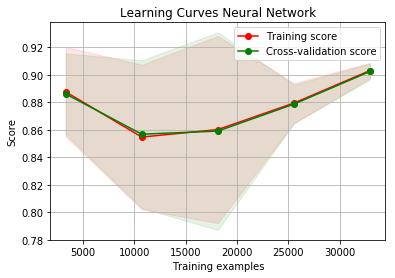

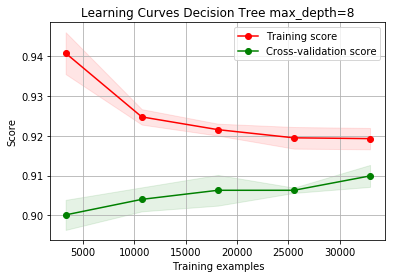

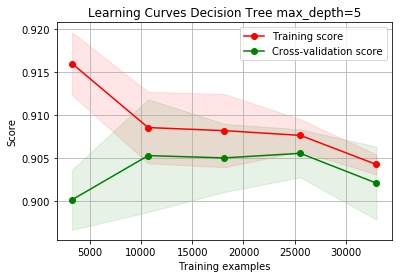

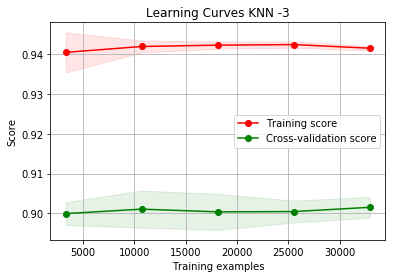

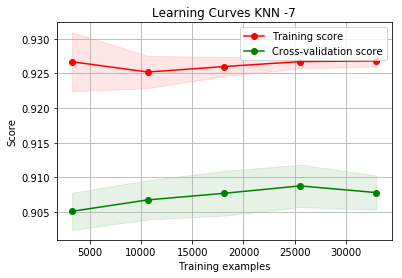

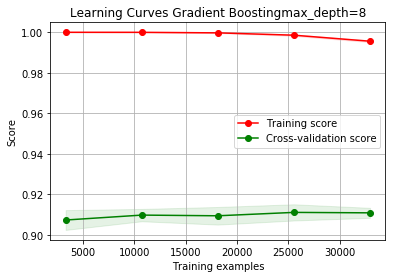

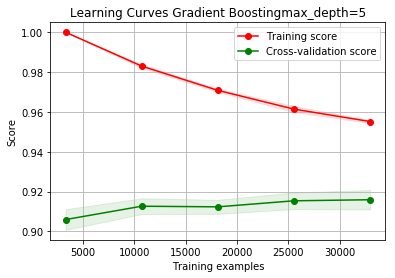

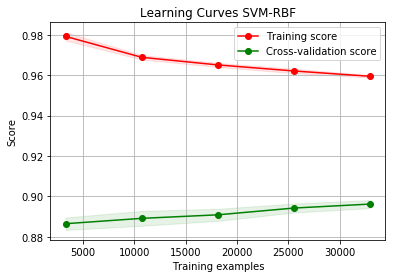

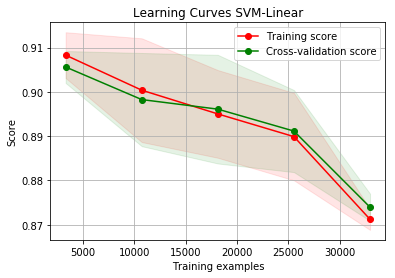

In [15]:
# The following for loop will iterate through lists of names and classifiers
columns=['Classifier','Data','Score','Time']
results = pd.DataFrame(columns=columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    end_time = time.time()
    # calculate the cross validation
    
    title = "Learning Curves "+name
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(clf, title, X, y, cv=cv, n_jobs=4)
    plt.show()
    tt1=time.time()
    results = results.append({'Classifier': name, 'Data': 'test data', 'Score': format(score*100, '.3f'),
                             'Time': format((end_time - start_time), '.2f')
                             }, ignore_index=True)

0    89.913
1    90.957
2    90.702
3    89.876
4    90.653
5    90.853
6    91.400
7    89.433
8    89.069
Name: Score, dtype: object


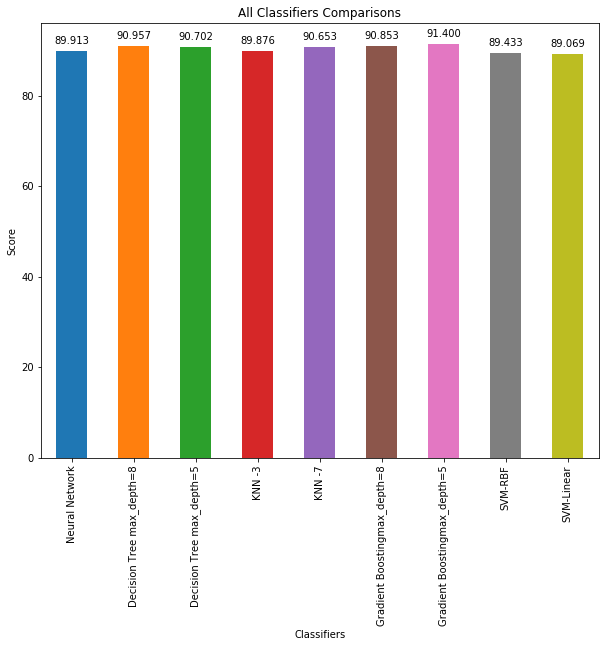

In [16]:
import matplotlib.pyplot as plt
print(results['Score'])
#a = np.array(results['Score'])
#freq_series = pd.Series.from_array(np.mean(a, axis=1))
freq_series = pd.Series(results['Score'].values)
# Plot the figure.
freq_series=freq_series.astype(float)
plt.figure(figsize=(10, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('All Classifiers Comparisons')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Score')
ax.set_xticklabels(names)
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.savefig('All Classifiers Score Comparisons')

0      0.97
1      0.11
2      0.10
3      2.78
4      3.03
5     33.80
6     12.29
7    162.81
8     64.66
Name: Time, dtype: object


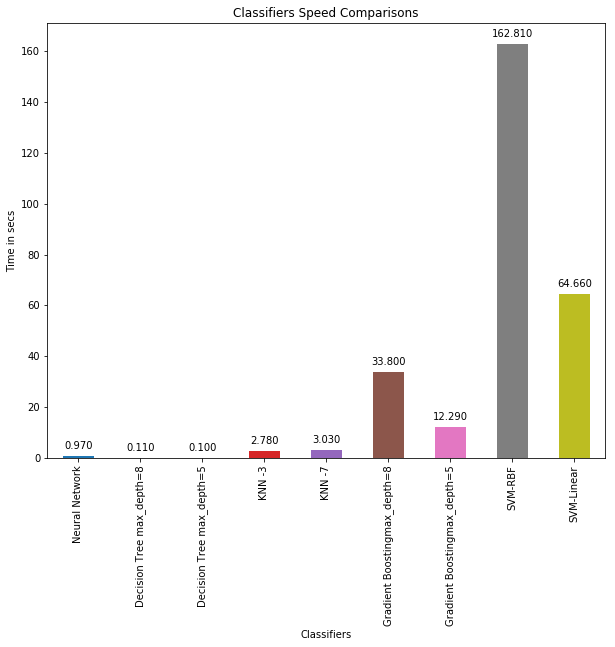

In [17]:
import matplotlib.pyplot as plt
print(results['Time'])
#a = np.array(results['Score'])
#freq_series = pd.Series.from_array(np.mean(a, axis=1))
freq_series = pd.Series(results['Time'].values)
# Plot the figure.
freq_series=freq_series.astype(float)
plt.figure(figsize=(10, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Classifiers Speed Comparisons')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Time in secs')
ax.set_xticklabels(names)
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.savefig('All Classifiers Time Comparisons')
